## Molecule Tools

### Get a fragment and add H atoms

In [1]:
import scm.plams as plams
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:>

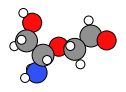

In [2]:
mol = plams.from_smiles("NC(CO)OCC=O")
plams.plot_molecule(mol)

Get a fragment from the initial molecule

<AxesSubplot:>

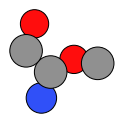

In [3]:
fragment = mol.get_fragment([0, 1, 2, 3, 4, 5])
plams.plot_molecule(fragment)

Add H atoms to fill the missing bonds

In [4]:
fragment_h = fragment.add_hatoms()

<AxesSubplot:>

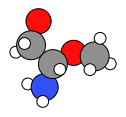

In [5]:
plams.plot_molecule(fragment_h)

Text(0, 0.5, 'count')

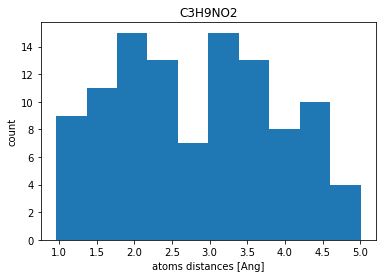

In [6]:
matrix = plams.toASE(fragment_h).get_all_distances()
mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)
plt.hist(matrix[mask])
plt.title(fragment_h.get_formula())
plt.xlabel("atoms distances [Ang]")
plt.ylabel("count")

### Visualize molecule

With ase tools

<AxesSubplot:>

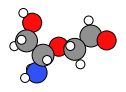

In [7]:
import scm.plams as plams

mol = plams.from_smiles("NC(CO)OCC=O")
plams.plot_molecule(mol)

With rdkit

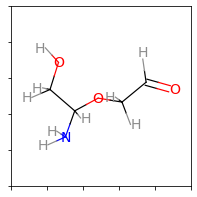

In [8]:
from rdkit.Chem import Draw

rdkit_mol = plams.to_rdmol(mol)

img = Draw.MolToMPL(rdkit_mol, size=(100, 100))
# img = Draw.MolToSVG(rdkit_mol, size=(100, 100))

In [9]:
import rdkit

# !amspython -m pip install --upgrade rdkit

print(rdkit.__version__)

2017.09.3


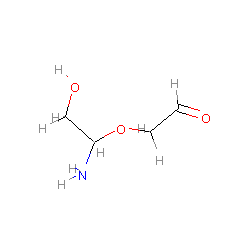

In [10]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 250, 250

rdkit_mol

### Retrieve structure from online

In [15]:
# import requests
# from rdkit import Chem

# morphine_url = "https://go.drugbank.com/structures/small_molecule_drugs/DB00295.mol"
# morphine = requests.get(morphine_url).text
# print(morphine)
# morphine = Chem.MolFromMolBlock(morphine)
# morphine